# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
import sys
import numpy as np
import pandas as pd

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_business = pd.read_csv("1.4 business_type.csv" ,encoding='UTF-8',header = 1) 

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(450, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                450 non-null    object
 1   동                  450 non-null    object
 2   택시운송업              450 non-null    object
 3   택시운송업.1            450 non-null    object
 4   한식 일반 음식점업         450 non-null    object
 5   한식 일반 음식점업.1       450 non-null    object
 6   용달 화물자동차 운송업       450 non-null    object
 7   용달 화물자동차 운송업.1     450 non-null    object
 8   부동산 중개 및 대리업       450 non-null    object
 9   부동산 중개 및 대리업.1     450 non-null    object
 10  두발미용업              450 non-null    object
 11  두발미용업.1            450 non-null    object
 12  커피전문점              450 non-null    object
 13  커피전문점.1            450 non-null    object
 14  남녀용 겉옷 및 셔츠 도매업    450 non-null    object
 15  남녀용 겉옷 및 셔츠 도매업.1  450 non-null    object
 16  기타주점업              450 non-null    object
 1

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_business.head(10)

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33
5,종로구,부암동,22,22,26,100,9,9,17,26,...,24,62,3,6,7,23,16,59,3,15
6,종로구,평창동,10,10,31,116,11,11,33,52,...,19,62,2,4,26,54,25,71,10,103
7,종로구,무악동,10,10,10,26,410,416,12,17,...,7,15,-,-,-,-,14,50,1,2
8,종로구,교남동,14,14,14,44,7,7,26,37,...,13,55,-,-,1,1,5,22,3,15
9,종로구,가회동,9,9,57,270,7,7,16,23,...,46,133,2,2,5,9,3,10,6,21


#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 동별이 아닌 구별 인구로 바꾸기
sb_1 = seoul_business.loc[(seoul_business['동']=='소계')]
sb_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 432
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                25 non-null     object
 1   동                  25 non-null     object
 2   택시운송업              25 non-null     object
 3   택시운송업.1            25 non-null     object
 4   한식 일반 음식점업         25 non-null     object
 5   한식 일반 음식점업.1       25 non-null     object
 6   용달 화물자동차 운송업       25 non-null     object
 7   용달 화물자동차 운송업.1     25 non-null     object
 8   부동산 중개 및 대리업       25 non-null     object
 9   부동산 중개 및 대리업.1     25 non-null     object
 10  두발미용업              25 non-null     object
 11  두발미용업.1            25 non-null     object
 12  커피전문점              25 non-null     object
 13  커피전문점.1            25 non-null     object
 14  남녀용 겉옷 및 셔츠 도매업    25 non-null     object
 15  남녀용 겉옷 및 셔츠 도매업.1  25 non-null     object
 16  기타주점업              25 non-null     object
 17

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 종사자수만 표시하게 바꾸기
sb_2 = sb_1.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21]]
sb_2.head()

,자치구,동,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
2,종로구,소계,215,"5,912",646,889,480,"3,613",962,"1,413",382,"1,982"
20,중구,소계,235,"6,414",333,"1,152",816,"3,542","24,248",982,175,"2,121"
36,용산구,소계,523,"2,987",466,"1,214",777,"2,076",317,"1,332",573,"1,184"
53,성동구,소계,"2,527","2,785","1,161","1,453",851,"1,859","1,572",621,"1,494","1,545"
71,광진구,소계,"1,744","2,861",985,"1,313","1,337","1,887",687,"1,577","1,646","1,678"


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sb_3 = sb_2.drop('동', axis=1)

In [9]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.
sb_3.to_csv('df_seoul_business.csv')

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [10]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [11]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [15]:
ssb = pd.merge(standard,sb_3)
ssb.head()

,도착 시군구 코드,자치구,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
0,11010,종로구,215,"5,912",646,889,480,"3,613",962,"1,413",382,"1,982"
1,11020,중구,235,"6,414",333,"1,152",816,"3,542","24,248",982,175,"2,121"
2,11030,용산구,523,"2,987",466,"1,214",777,"2,076",317,"1,332",573,"1,184"
3,11040,성동구,"2,527","2,785","1,161","1,453",851,"1,859","1,572",621,"1,494","1,545"
4,11050,광진구,"1,744","2,861",985,"1,313","1,337","1,887",687,"1,577","1,646","1,678"


In [16]:

ssb_n = ssb.drop('자치구', axis=1)

for col in ssb_n.columns:
    ssb_n[col] = ssb_n[col].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
ssb_n = ssb_n.astype(int)


In [17]:
ssb1 = pd.merge(standard,ssb_n)
ssb1.head()

,도착 시군구 코드,자치구,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
0,11010,종로구,215,5912,646,889,480,3613,962,1413,382,1982
1,11020,중구,235,6414,333,1152,816,3542,24248,982,175,2121
2,11030,용산구,523,2987,466,1214,777,2076,317,1332,573,1184
3,11040,성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545
4,11050,광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678


In [18]:
ssb1 = ssb1.drop('도착 시군구 코드', axis=1)
ssb1.head()

,자치구,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
0,종로구,215,5912,646,889,480,3613,962,1413,382,1982
1,중구,235,6414,333,1152,816,3542,24248,982,175,2121
2,용산구,523,2987,466,1214,777,2076,317,1332,573,1184
3,성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545
4,광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sb_T = sb_n.T
sb_T

,2,20,36,53,71,87,102,119,140,154,...,257,278,294,305,324,340,362,381,404,432
자치구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
택시운송업.1,215,235,523,"2,527","1,744","2,093","6,262","2,643","2,589","5,783",...,"6,922","3,817","2,598","2,397","1,115","2,027",903,"2,517","4,850","4,980"
한식 일반 음식점업.1,"5,912","6,414","2,987","2,785","2,861","3,566","2,479","2,822","2,663","2,009",...,"4,584","3,215","2,619","6,476","2,322","3,689","6,712","11,486","5,760","3,388"
용달 화물자동차 운송업.1,646,333,466,"1,161",985,"1,456","1,877","1,335","1,030","1,574",...,"1,862","1,351",997,"1,429",844,"1,600",411,487,"1,931","1,566"
부동산 중개 및 대리업.1,889,"1,152","1,214","1,453","1,313","1,208","1,104","1,175",867,794,...,"2,352","1,213","1,381","1,566","1,483","2,136","2,758","6,508","3,190","1,990"
두발미용업.1,480,816,777,851,"1,337",891,"1,108","1,245",997,847,...,"1,751","1,134",715,"1,261","1,105","1,604","1,832","6,255","2,328","1,429"
커피전문점.1,"3,613","3,542","2,076","1,859","1,887","1,472","1,037","1,384","1,095",837,...,"2,530","1,384","1,215","3,295","1,628","2,049","3,897","7,273","3,372","1,660"
남녀용 겉옷 및 셔츠 도매업.1,962,"24,248",317,"1,572",687,976,284,454,94,43,...,700,923,"2,575","1,220",199,190,"1,563","8,320","2,830","1,433"
기타주점업.1,"1,413",982,"1,332",621,"1,577","1,082","1,000","1,030","1,275",477,...,"1,709","1,165",685,"1,489",955,"1,672","1,255","2,528","1,469","1,349"
일반 교과 학원.1,382,175,573,"1,494","1,646",984,"1,045","1,755",740,"1,162",...,"2,347","1,111",487,"1,082","1,463","1,230","3,812","9,020","4,160","2,104"


In [98]:
index = sb_T.index

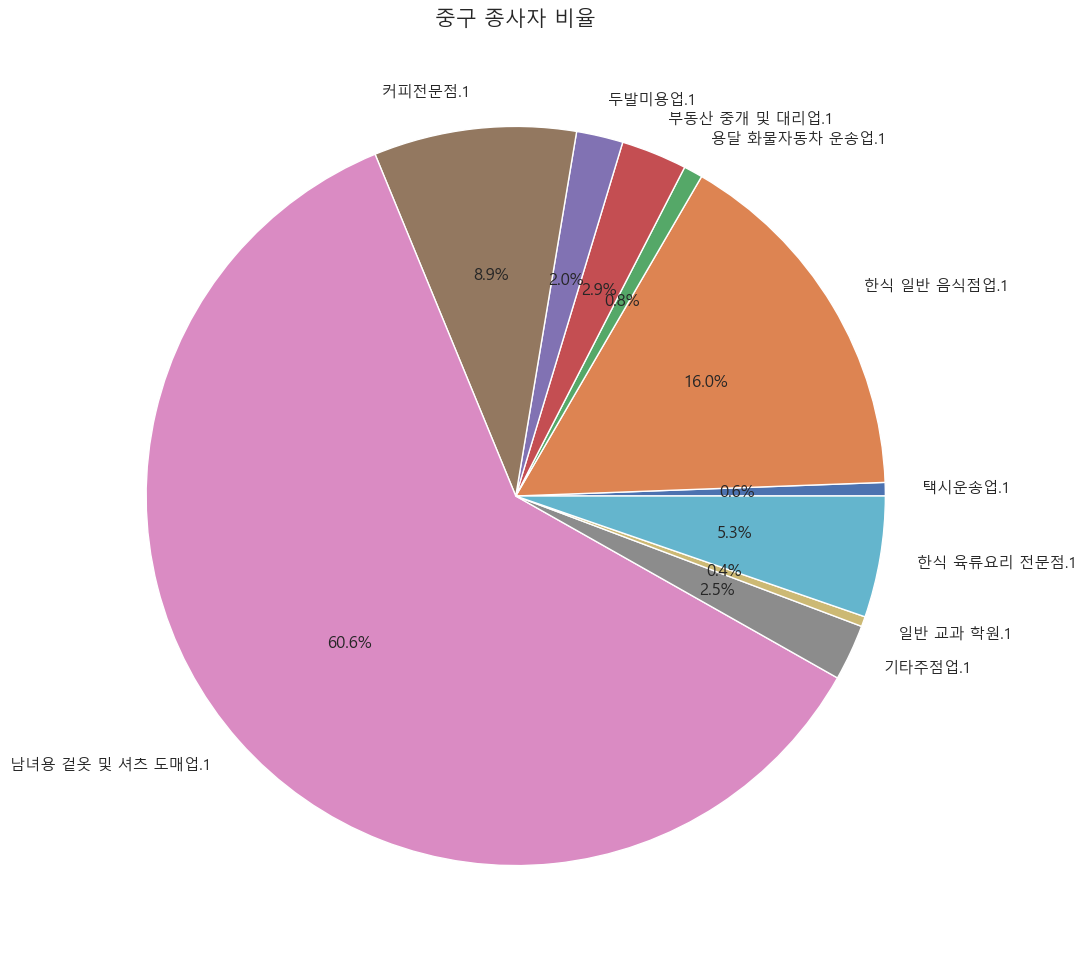

In [114]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(12,12))
plt.pie(sb_T['중구'],labels=index,autopct="%1.1f%%")
plt.title('중구 종사자 비율',size=15)
plt.show()

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---